In [27]:
import ipykernel
ipykernel._version

<module 'ipykernel._version' from 'c:\\ProgramData\\anaconda3\\envs\\ia\\lib\\site-packages\\ipykernel\\_version.py'>

In [28]:
import time
from torch.utils.data import Dataset
from torchvision import transforms
from matplotlib import pyplot as plt
from PIL import Image

In [29]:
total_time = 0

In [30]:
class TorchvisionDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, index):
        label = self.labels[index]
        file_path = self.file_paths[index]

        image = Image.open(file_path)

        start_t = time.time()
        if self.transform:
            image = self.transform(image)
        total_time = (time.time() - start_t)

        return image, label, total_time

In [31]:
torchvision_transform = transforms.Compose([
    transforms.Resize((1920,1080)),
    transforms.RandomCrop(1920,1080),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

In [32]:
torchvision_dataset = TorchvisionDataset(
    file_paths = ["C:/Users/yhd06/OneDrive/Desktop/iwaz/pothole_data/split_images_fin/AM_rainny_CI03_20211021_104445_604_3.jpg"],
    labels=[1],
    transform=torchvision_transform,
)

In [33]:
for i in range(20):
  sample, _, transform_time = torchvision_dataset[0]
  total_time += transform_time

print("torchvision time/sample: {} ms".format(total_time*10))

torchvision time/sample: 25.868911743164062 ms


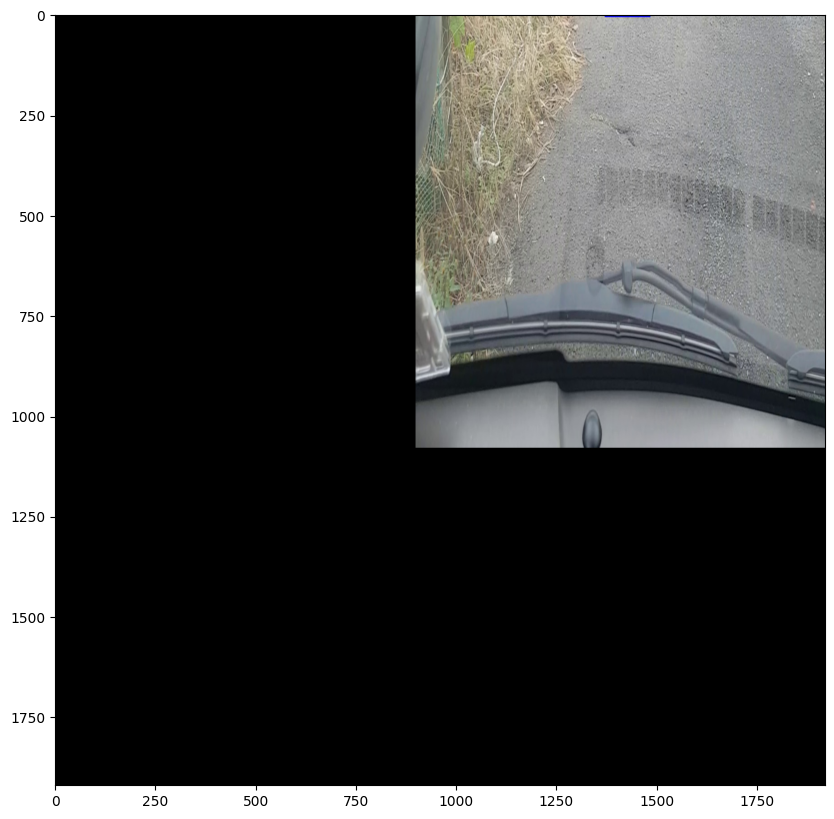

In [34]:
plt.figure(figsize=(10, 10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()